In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from datetime import datetime
import time

from sklearn.model_selection import train_test_split

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

plt.rcParams['figure.figsize']=(23,8)
def twosubplots(figsize=(23,8)):
    return plt.subplots(1,2,figsize=figsize)[1]

# Data

In [2]:
Categories = pd.read_csv('Categories1.csv')

The DateBlock

In [3]:
# DateBlock = Categories.drop(columns=['OrderPartId', 'OrderId', 'CustomerId', 'StoreId',
#        'ProductId', 'Quantity', 'year', 'month', 'day'])

In [4]:
# DateBlock.to_csv('DateBlock.csv', index = False, header=True)

In [5]:
# DataDate = pd.read_csv('CatDate.csv')

In [6]:
# DataDate = DataDate.sort_values(by='CreateOn')

In [7]:
# ys = DataDate.year.unique()
# ys
# for i in ys:
#     locals()["y"+str(i)] = DataDate[DataDate['year']==i]
# a=0
# b = []
# for i in ys: 
#     b = b + [x+a for x in list(locals()["y"+str(i)]['month'])]
#     a+=12
# DataDate['DataBlock'] = b

In [8]:
# DataDate.to_csv('Categories1.csv', index = False, header=True)

In [3]:
Categories = Categories.sort_values('CreateOn', ascending=True)

In [4]:
Product = pd.read_csv('Product.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Filtering out a product that was a sample and not paid for. 

In [5]:
Product[Product['ProductId']==187613]

,ProductId,CreatedOn,Product,Barcode,BrandId,Brand,CategoryId,Category1Id,Category2Id,Category3Id,Category4Id,Category1Name,Category2Name,Category3Name,Category4Name,ProductStateCode,ResponsibleUser,Supplier,CountActiveStore
3086,187613,20200831,ساشه شامپو لپیور*اشانتیون,9.79965e+12,34069,لپیور,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,نامشخص,خدمات تحقيقاتي آرين گستر,1105


In [3]:
CatFiltered = Categories.drop(Categories[Categories['ProductId']==187613].index).reset_index(drop=True)

In [4]:
CatFiltered

,OrderPartId,OrderId,CustomerId,StoreId,CreateOn,ProductId,Quantity,year,month,day,DataBlock
0,86,1460,10947,770,20180217,2424,3.0,2018,2,17,2
1,235,1556,11002,770,20180217,10859,2.0,2018,2,17,2
2,120,1483,683,698,20180217,8770,1.0,2018,2,17,2
3,225,1551,10996,336,20180217,12982,1.0,2018,2,17,2
4,78,1454,10964,770,20180217,5367,1.0,2018,2,17,2
...,...,...,...,...,...,...,...,...,...,...,...
33250054,8469301,8823006,2242642,2255,20210115,3279,6.0,2021,1,15,37
33250055,8496693,8850433,2575639,2383,20210115,3279,1.0,2021,1,15,37
33250056,8486641,8840362,1859351,2415,20210115,6428,1.0,2021,1,15,37
33250057,8470625,8824332,790516,4855,20210115,21943,1.0,2021,1,15,37


The data from March 2020. This includes the product Id and the Quantity it has been ordered in that order Id, but it is not a repeated version

In [5]:
Data2020_3 = CatFiltered[CatFiltered['DataBlock']>26].reset_index(drop=True)

In [7]:
Data2020_3

,OrderPartId,OrderId,CustomerId,StoreId,CreateOn,ProductId,Quantity,year,month,day,DataBlock
0,1154786,1493910,291651,1973,20200301,17281,2.0,2020,3,1,27
1,1155056,1494180,143060,1966,20200301,757,1.0,2020,3,1,27
2,1153108,1492232,359186,1966,20200301,17047,1.0,2020,3,1,27
3,1154675,1493799,55367,1973,20200301,174503,1.0,2020,3,1,27
4,1155124,1494248,529350,1966,20200301,178267,1.0,2020,3,1,27
...,...,...,...,...,...,...,...,...,...,...,...
29313542,8469301,8823006,2242642,2255,20210115,3279,6.0,2021,1,15,37
29313543,8496693,8850433,2575639,2383,20210115,3279,1.0,2021,1,15,37
29313544,8486641,8840362,1859351,2415,20210115,6428,1.0,2021,1,15,37
29313545,8470625,8824332,790516,4855,20210115,21943,1.0,2021,1,15,37


In [20]:
# Data2020_3.write.mode("overwrite").saveAsTable('database.Data2020_3table')

Making Lists of orders from the data

In [9]:
# Done and commented
Data2020_3['PID'] = Data2020_3['ProductId'].apply(str)

The repeated products based on the quantity ordered

In [18]:
# Done and commented
Data2020_3rep = Data2020_3.loc[Data2020_3.index.repeat(Data2020_3.Quantity)].reset_index(drop=True)

In [19]:
Data2020_3rep

,OrderId,list,OrderPartId,CustomerId,StoreId,CreateOn,ProductId,Quantity,year,month,day,DataBlock
0,1491929,"['11530', '149900', '149898', '166700', '16671...",1152805,631713,1959,20200301,11530,1.0,2020,3,1,27
1,1491929,"['11530', '149900', '149898', '166700', '16671...",1152805,631713,1959,20200301,149900,1.0,2020,3,1,27
2,1491929,"['11530', '149900', '149898', '166700', '16671...",1152805,631713,1959,20200301,149898,1.0,2020,3,1,27
3,1491929,"['11530', '149900', '149898', '166700', '16671...",1152805,631713,1959,20200301,166700,1.0,2020,3,1,27
4,1491929,"['11530', '149900', '149898', '166700', '16671...",1152805,631713,1959,20200301,166710,1.0,2020,3,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...
47623689,8859364,"['8993', '21404', '11510', '11510']",8505615,4829912,5114,20210115,11510,2.0,2021,1,15,37
47623690,8860270,"['189597', '3525', '8654', '8654']",8506520,3824408,2441,20210115,189597,1.0,2021,1,15,37
47623691,8860270,"['189597', '3525', '8654', '8654']",8506520,3824408,2441,20210115,3525,1.0,2021,1,15,37
47623692,8860270,"['189597', '3525', '8654', '8654']",8506520,3824408,2441,20210115,8654,2.0,2021,1,15,37


In [21]:
# Data2020_3rep.to_csv('Data2020_3rep.csv', index = False, header=True)

Removing unnecessery columns for joining

In [12]:
Data2020_3test= Data2020_3rep.drop(columns=['OrderPartId', 'CustomerId', 'StoreId', 'CreateOn',
       'ProductId', 'Quantity', 'year', 'month', 'day', 'DataBlock'])

In [14]:
# Done and commented
# Data2020_3Join = Data2020_3test.groupby(['OrderId'])['PID'].apply(lambda x: ','.join(x)).reset_index()

In [73]:
# Done and commented
# Data2020_3Join.to_csv('Data2020_3Join.csv', index = False, header=True)

In [11]:
Data2020_3Join = pd.read_csv('Data2020_3Join_list.csv')

In [128]:
def Convert(string): 
    li = list(string.split(',')) 
    return li 

In [25]:
# Done and commented
# Data2020_3Join['list'] = Data2020_3Join['PID'].apply(lambda x: Convert(x))

In [23]:
# Done and commented
# Data2020_3Join.to_csv('Data2020_3Join_list.csv', index = False, header=True)

In [10]:
# Data2020_3Join_list = pd.read_csv('Data2020_3Join_list.csv')

List of items in each order 

In [14]:
Data2020_3Join = Data2020_3Join.drop(columns=['PID'])
Data2020_3Join

,OrderId,list
0,1491929,"['11530', '149900', '149898', '166700', '16671..."
1,1491930,"['181739', '151666', '151666', '35482', '17769..."
2,1491931,"['150378', '150400', '150400', '150400', '1504..."
3,1491933,"['19685', '19685', '18018', '18018', '13675', ..."
4,1491934,"['150090', '150090', '172292', '15476', '18247..."
...,...,...
5327056,8858758,"['13242', '13242', '1257', '1257', '186453', '..."
5327057,8858910,"['8993', '8993']"
5327058,8858922,"['21953', '16511', '14540', '14540']"
5327059,8859364,"['8993', '21404', '11510', '11510']"


Merging the data from march 2020 upto now. A list of items in each order is added. this is the unrepeated version 

In [15]:
# Done and commented
Data2020_3 = pd.merge(right=Data2020_3 , left=Data2020_3Join , left_on='OrderId' , right_on='OrderId')

In [16]:
Data2020_3

,OrderId,list,OrderPartId,CustomerId,StoreId,CreateOn,ProductId,Quantity,year,month,day,DataBlock
0,1491929,"['11530', '149900', '149898', '166700', '16671...",1152805,631713,1959,20200301,11530,1.0,2020,3,1,27
1,1491929,"['11530', '149900', '149898', '166700', '16671...",1152805,631713,1959,20200301,149900,1.0,2020,3,1,27
2,1491929,"['11530', '149900', '149898', '166700', '16671...",1152805,631713,1959,20200301,149898,1.0,2020,3,1,27
3,1491929,"['11530', '149900', '149898', '166700', '16671...",1152805,631713,1959,20200301,166700,1.0,2020,3,1,27
4,1491929,"['11530', '149900', '149898', '166700', '16671...",1152805,631713,1959,20200301,166710,1.0,2020,3,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...
29313542,8859364,"['8993', '21404', '11510', '11510']",8505615,4829912,5114,20210115,21404,1.0,2021,1,15,37
29313543,8859364,"['8993', '21404', '11510', '11510']",8505615,4829912,5114,20210115,11510,2.0,2021,1,15,37
29313544,8860270,"['189597', '3525', '8654', '8654']",8506520,3824408,2441,20210115,189597,1.0,2021,1,15,37
29313545,8860270,"['189597', '3525', '8654', '8654']",8506520,3824408,2441,20210115,3525,1.0,2021,1,15,37


Number of products ordered from march in total is :  47623694

In [20]:
Total_Number_of_products_ordered = Data2020_3rep.shape[0]
Total_Number_of_products_ordered

47623694

In [ ]:
# Done and Commented
Data2020_3Baskets = Data2020_3.drop(columns=['ProductId', 'Quantity', 'year', 'month', 'day'])

In [ ]:
Data2020_3Baskets

In [ ]:
# Done and commented
Data2020_3Baskets = Data2020_3Baskets.groupby('OrderId').agg({'list':'first', 'OrderPartId':'first', 'CustomerId':'first', 'StoreId':'first',
       'CreateOn':'first','DataBlock':'first'}).reset_index()

In [30]:
# Done and commented
# Data2020_3Baskets.to_csv('Data2020_3Baskets.csv', index = False, header=True)

The baskets of the customers from march, the basket is a list and the number of items ordered is repeated according the quantity ordered

In [21]:
Data2020_3Baskets = pd.read_csv('Data2020_3Baskets.csv')

In [22]:
Data2020_3Baskets

,OrderId,list,OrderPartId,CustomerId,StoreId,CreateOn,DataBlock
0,1491929,"['11530', '149900', '149898', '166700', '16671...",1152805,631713,1959,20200301,27
1,1491930,"['181739', '151666', '151666', '35482', '17769...",1152806,632280,1967,20200301,27
2,1491931,"['150378', '150400', '150400', '150400', '1504...",1152807,469844,1971,20200301,27
3,1491933,"['19685', '19685', '18018', '18018', '13675', ...",1152809,234142,1959,20200301,27
4,1491934,"['150090', '150090', '172292', '15476', '18247...",1152810,87873,1966,20200301,27
...,...,...,...,...,...,...,...
3639572,6719427,"['15467', '15467']",6368429,3264951,2071,20201209,36
3639573,6719428,"['1381', '175577', '175577', '175577', '15426'...",6368430,1874983,2387,20201209,36
3639574,6719429,"['22168', '22168', '22168', '22168', '2423', '...",6368431,1090933,3640,20201209,36
3639575,6719430,"['17263', '144008', '21638', '178791', '13251'...",6368432,3441859,2426,20201209,36


The number of orders put in place and delivered is 5327061

In [23]:
Neumber_of_orders = Data2020_3.OrderId.nunique()
# = Data2020_3Baskets.shape[0]
Neumber_of_orders

5327061

## The most ordered products

In [33]:
Data2020_3rep = Data2020_3rep.drop(columns=['month','year','day'])

In [34]:
Data2020_3rep

,OrderPartId,OrderId,CustomerId,StoreId,CreateOn,ProductId,Quantity,DataBlock,PID
0,1154055,1493179,525015,1966,20200301,10834,2.0,27,10834
1,1154055,1493179,525015,1966,20200301,10834,2.0,27,10834
2,1154388,1493512,634456,1971,20200301,504,1.0,27,504
3,1153166,1492290,197456,1966,20200301,3107,1.0,27,3107
4,1153336,1492460,383906,1973,20200301,7791,1.0,27,7791
...,...,...,...,...,...,...,...,...,...
47623689,8436153,8789823,2433437,2435,20210115,1300,1.0,37,1300
47623690,8453114,8806802,3825895,3698,20210115,11868,1.0,37,11868
47623691,8479300,8833015,1269739,2000,20210115,1048,2.0,37,1048
47623692,8479300,8833015,1269739,2000,20210115,1048,2.0,37,1048


In [40]:
# Done and commented
Number_of_products_ordered = Data2020_3rep.groupby('ProductId').count()

In [36]:
# Done and commented
Number_of_products_ordered = Number_of_products_ordered.drop(columns=['OrderPartId','PID', 'OrderId', 'CustomerId', 'StoreId', 'CreateOn',
        'DataBlock'])

In [37]:
Number_of_products_ordered = Number_of_products_ordered.sort_values(by='Quantity' , ascending=False).reset_index()

In [38]:
Number_of_products_ordered

,ProductId,Quantity
0,428,594032
1,17148,453720
2,18,271710
3,17151,230913
4,219,197994
...,...,...
17473,185038,1
17474,185019,1
17475,185010,1
17476,184997,1


In [27]:
Product_names = Product.drop( columns=['CreatedOn', 'Barcode', 'BrandId', 'Brand',
       'CategoryId', 'Category1Id', 'Category2Id', 'Category3Id',
       'Category4Id', 'Category1Name', 'Category2Name', 'Category3Name',
       'Category4Name', 'ProductStateCode', 'ResponsibleUser', 'Supplier',
       'CountActiveStore'])

In [34]:
Number_of_products_ordered_names = pd.merge(left = Number_of_products_ordered , right = Product_names , left_on='ProductId' , right_on = 'ProductId').reset_index(drop=True)

In [29]:
Number_of_products_ordered_names = Number_of_products_ordered_names.sort_values(by='Quantity' , ascending = False).reset_index(drop=True)

In [40]:
Number_of_products_ordered_names.head(12)

,ProductId,Quantity,percent,Product
0,428,594032,1.247345,نوشابه خانواده 1500 سی سی کوکا کولا
1,17148,453720,0.952719,نوشابه قوطی 330 سی سی پپسی
2,18,271710,0.570535,ویفر رنگارنگ 14.5 گرمی مینو
3,17151,230913,0.484870,نوشابه 300 سی سی پپسی
4,219,197994,0.415747,بیسکوییت ساقه طلایی 200 گرمی مینو
5,423,196514,0.412639,کیک مغزدار تاینی دوقلو 60 گرمی شیرین عسل
6,9787,194839,0.409122,رب گوجه فرنگی 800 گرمی رعنا
7,178663,188107,0.394986,آب آشامیدنی 1500میلی لیتری اُ لایف
8,430,171712,0.360560,نوشابه پت 300 سی سی کوکاکولا
9,150291,168811,0.354469,کیک لایه ای اسفنجی کاکائویی 45 گرمی نادی


<AxesSubplot:>

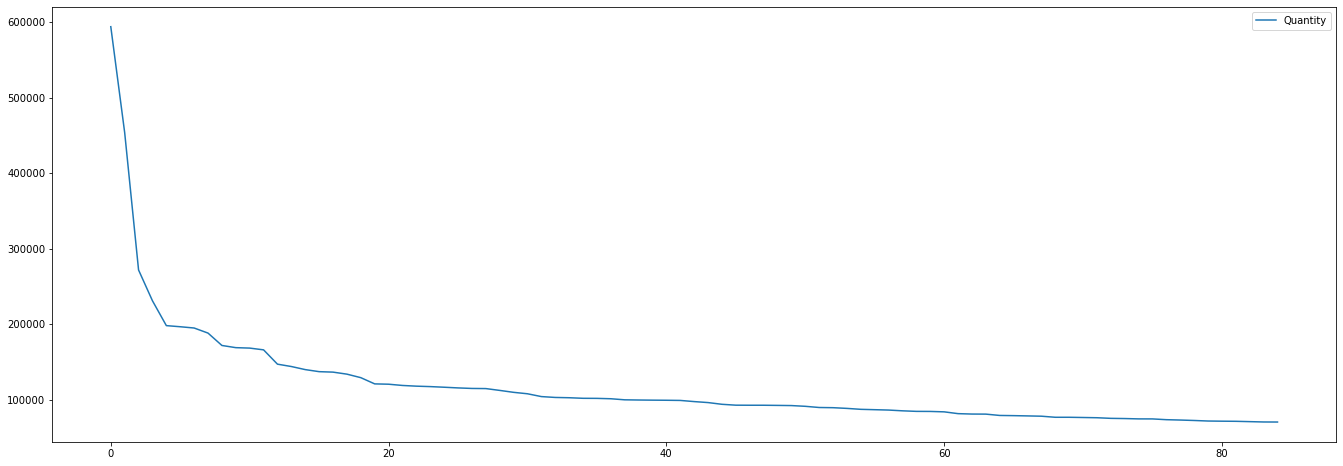

In [64]:
Number_of_products_ordered[Number_of_products_ordered['Quantity']>70000].plot(y='Quantity')

<AxesSubplot:xlabel='ProductId'>

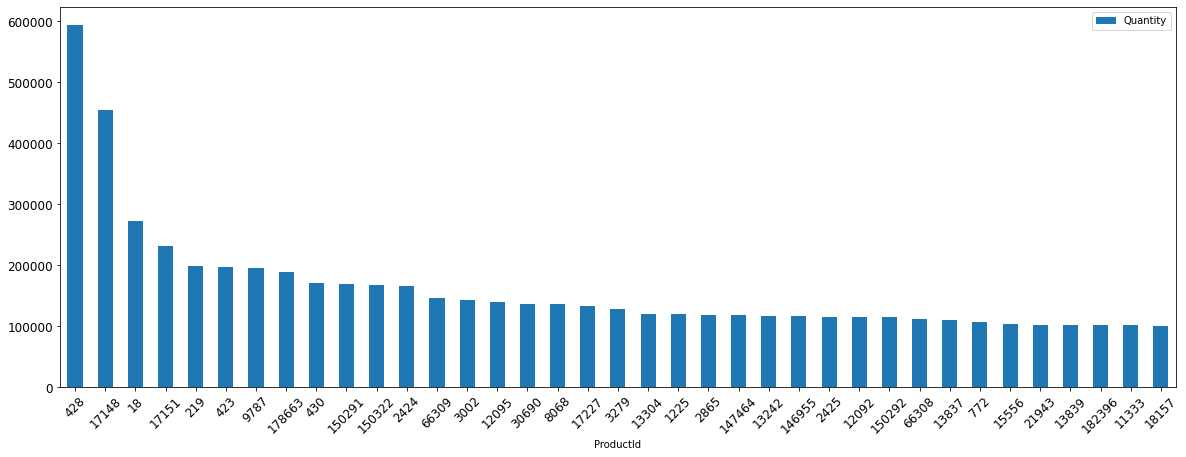

In [67]:
Number_of_products_ordered[Number_of_products_ordered['Quantity']>100000].plot.bar(x = 'ProductId',y = 'Quantity' , grid=False, rot=45, fontsize=12 , figsize=(20,7))

<AxesSubplot:xlabel='ProductId'>

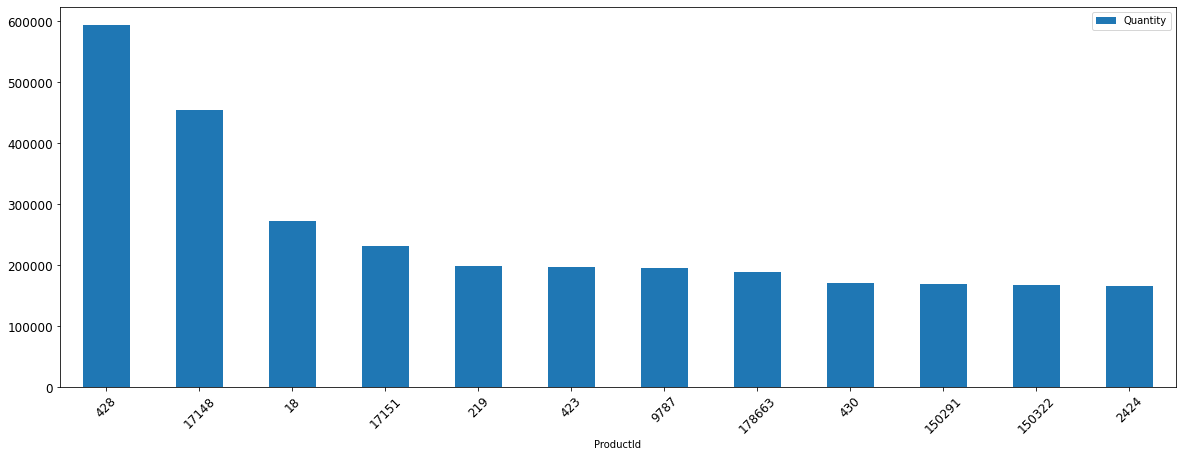

In [68]:
Number_of_products_ordered[Number_of_products_ordered['Quantity']>150000].plot.bar(x = 'ProductId',y = 'Quantity' , grid=False, rot=45, fontsize=12 , figsize=(20,7))

Percent of the products ordered

In [44]:
# Done and commented
Number_of_products_ordered_names['percent'] = Number_of_products_ordered_names['Quantity']*100/Total_Number_of_products_ordered

In [45]:
Number_of_products_ordered_names = Number_of_products_ordered_names.sort_values(by='percent',ascending=False)

In [41]:
Number_of_products_ordered_names.head()

,ProductId,Quantity,percent,Product
0,428,594032,1.247345,نوشابه خانواده 1500 سی سی کوکا کولا
1,17148,453720,0.952719,نوشابه قوطی 330 سی سی پپسی
2,18,271710,0.570535,ویفر رنگارنگ 14.5 گرمی مینو
3,17151,230913,0.484870,نوشابه 300 سی سی پپسی
4,219,197994,0.415747,بیسکوییت ساقه طلایی 200 گرمی مینو


In [42]:
Number_of_products_ordered_names.percent.sum()

100.00000000000001

In [37]:
# Done and commented
# Number_of_products_ordered.to_csv('Number_of_products_ordered.csv', index = False, header=True)
# Number_of_products_ordered_names.to_csv('Number_of_products_ordered_names.csv', index = False, header=True)

In [24]:
Number_of_products_ordered = pd.read_csv('Number_of_products_ordered.csv')

In [26]:
Number_of_products_ordered

,index,ProductId,Quantity,percent
0,0,428,594032,1.247345
1,1,17148,453720,0.952719
2,2,18,271710,0.570535
3,3,17151,230913,0.484870
4,4,219,197994,0.415747
...,...,...,...,...
17473,17473,172943,1,0.000002
17474,17474,56948,1,0.000002
17475,17475,172872,1,0.000002
17476,17476,172805,1,0.000002


## The most Popular products

The popularity is how many orders contain a certain product 


In [43]:
Number_of_baskets_containing_products = Data2020_3.drop(columns=['OrderPartId', 'StoreId', 'CreateOn',
                                                                 'Quantity', 'year', 'month', 'day', 'DataBlock'])

In [44]:
Number_of_baskets_containing_products.sort_values(by='OrderId')

,OrderId,list,CustomerId,ProductId
0,1491929,"['11530', '149900', '149898', '166700', '16671...",631713,11530
1,1491929,"['11530', '149900', '149898', '166700', '16671...",631713,149900
2,1491929,"['11530', '149900', '149898', '166700', '16671...",631713,149898
3,1491929,"['11530', '149900', '149898', '166700', '16671...",631713,166700
4,1491929,"['11530', '149900', '149898', '166700', '16671...",631713,166710
...,...,...,...,...
29313541,8859364,"['8993', '21404', '11510', '11510']",4829912,8993
29313543,8859364,"['8993', '21404', '11510', '11510']",4829912,11510
29313545,8860270,"['189597', '3525', '8654', '8654']",3824408,3525
29313544,8860270,"['189597', '3525', '8654', '8654']",3824408,189597


Making customerIds into a string to count how many customers ordered the same thing

In [45]:
Number_of_baskets_containing_products.OrderId.nunique()

5327061

In [46]:
Number_of_baskets_containing_products.CustomerId.nunique()

2192325

In [47]:
#Forget about it
# Number_of_baskets_containing_products['CID'] = Number_of_baskets_containing_products['CustomerId']

This gives the unique number count of Orders (Baskets) and CustomerIds that have a productId in them

In [48]:
# Done and Commented
Number_of_baskets_unique_customer = Number_of_baskets_containing_products.groupby('ProductId').agg(
    {'OrderId':lambda x: x.nunique() , 'CustomerId':lambda x: x.nunique()}).reset_index()

In [49]:
Number_of_baskets_unique_customer = Number_of_baskets_unique_customer.rename(columns={'OrderId':'BasketsCount' , 'CustomerId':'UniqueCustomersCount'})

In [50]:
Number_of_baskets_unique_customer

,ProductId,BasketsCount,UniqueCustomersCount
0,3,5655,5111
1,6,368,357
2,7,501,487
3,8,265,253
4,9,6022,5601
...,...,...,...
17473,190595,3,3
17474,190627,2072,2072
17475,190628,2072,2072
17476,190629,2070,2070


In [51]:
Number_of_baskets_unique_customer.UniqueCustomersCount.sum()

26571565

In [52]:
Number_of_orders = Data2020_3['OrderId'].nunique()

In [53]:
Number_of_baskets_unique_customer['percent_basket'] = Number_of_baskets_unique_customer['BasketsCount']*100/Number_of_orders

In [54]:
Number_of_baskets_unique_customer['percent_customers'] = Number_of_baskets_unique_customer['UniqueCustomersCount']*100/Number_of_orders

In [55]:
Number_of_baskets_unique_customer = Number_of_baskets_unique_customer.sort_values(by='percent_basket',ascending=False).reset_index()

In [56]:
Number_of_baskets_unique_customer.head()

,index,ProductId,BasketsCount,UniqueCustomersCount,percent_basket,percent_customers
0,118,428,220468,172551,4.138642,3.239141
1,1339,8068,115149,89064,2.161586,1.671916
2,697,2424,98356,82645,1.846346,1.551418
3,4085,18157,90428,79066,1.697521,1.484233
4,1688,9787,88753,78045,1.666078,1.465067


In [57]:
Number_of_baskets_unique_customer = pd.merge(left=Number_of_baskets_unique_customer , right=Product_names , left_on='ProductId',right_on='ProductId')

In [58]:
Number_of_baskets_unique_customer = Number_of_baskets_unique_customer.drop(columns='index')

In [59]:
Number_of_baskets_unique_customer.head(12)

,ProductId,BasketsCount,UniqueCustomersCount,percent_basket,percent_customers,Product
0,428,220468,172551,4.138642,3.239141,نوشابه خانواده 1500 سی سی کوکا کولا
1,8068,115149,89064,2.161586,1.671916,پنیر فتا 400 گرمی هراز
2,2424,98356,82645,1.846346,1.551418,کرانچی پنیری بزرگ چی توز
3,18157,90428,79066,1.697521,1.484233,پنیر پیتزا پروسس رنده شده 500 گرمی 206
4,9787,88753,78045,1.666078,1.465067,رب گوجه فرنگی 800 گرمی رعنا
5,11333,83246,67282,1.562700,1.263023,پنیر یواف بسته بندی کاوردار 400 گرمی صباح
6,12095,82341,61079,1.545712,1.146580,روغن سرخ کردنی بدون پالم شفاف 1350گرمی اویلا
7,30690,75443,65112,1.416222,1.222287,چیپس کچاپ متوسط 60 گرمی چی توز
8,219,74610,63576,1.400585,1.193454,بیسکوییت ساقه طلایی 200 گرمی مینو
9,146955,72544,64393,1.361802,1.208790,اسنک طلایی پذیرایی 175 گرمی چی توز


## Note: 
Take note that the sum of the percentages does not add to %100, which is not a problem here. This the baskets are counted more times due to the fact that they can have similar items in them. 

### Note: 
this is not the repeated version... so you're not counting how many Items were purchased in each basket, only if the order contained the product

<AxesSubplot:>

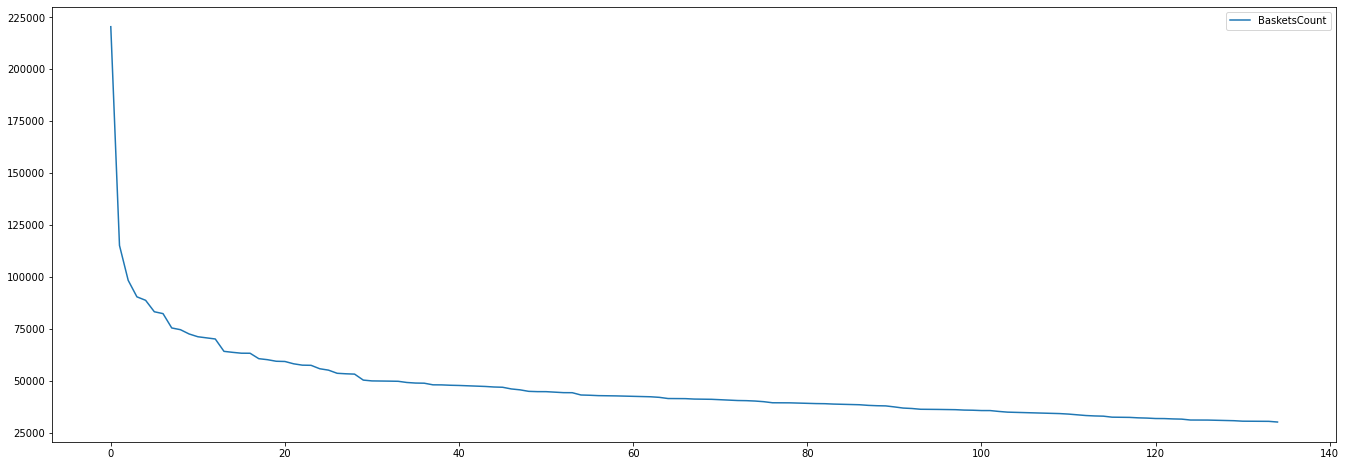

In [101]:
Number_of_baskets_unique_customer[Number_of_baskets_unique_customer['BasketsCount']>30000].plot( y='BasketsCount')

<AxesSubplot:xlabel='ProductId'>

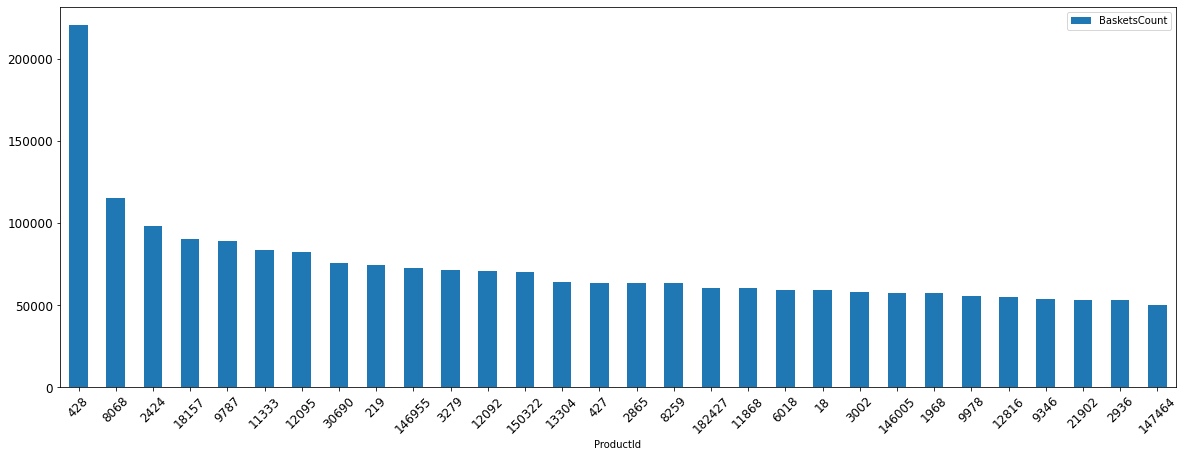

In [102]:
Number_of_baskets_unique_customer[Number_of_baskets_unique_customer['BasketsCount']>50000].plot.bar(x = 'ProductId' , y='BasketsCount', grid=False, rot=45, fontsize=12 , figsize=(20,7))

<AxesSubplot:xlabel='ProductId'>

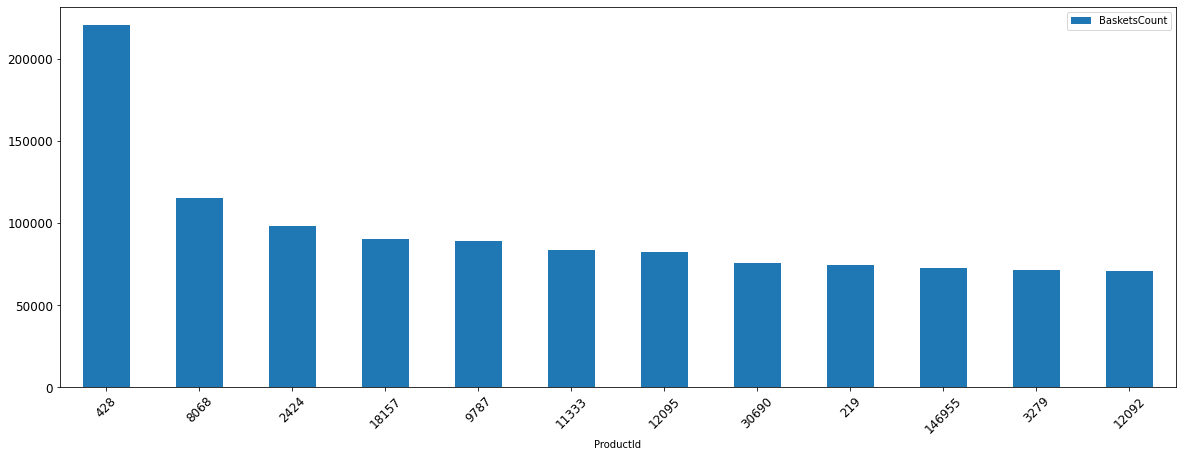

In [62]:
Number_of_baskets_unique_customer[Number_of_baskets_unique_customer['BasketsCount']>70500].plot.bar(x = 'ProductId' , y='BasketsCount', grid=False, rot=45, fontsize=12 , figsize=(20,7))

## The most ordered category

Number_of_baskets_containing_products is actually Data2020_3 with the rest of the columns dropped. But this is not the repeated version... so you're not counting how many Items were purchased in each basket, only if the order contained the product

In [66]:
Data2020_3_C4 = Data2020_3.drop(columns = ['OrderPartId', 'CustomerId', 'StoreId', 'CreateOn',
         'year', 'month', 'day', 'DataBlock'])

In [67]:
Data2020_3_C4

,OrderId,list,ProductId,Quantity
0,1491929,"['11530', '149900', '149898', '166700', '16671...",11530,1.0
1,1491929,"['11530', '149900', '149898', '166700', '16671...",149900,1.0
2,1491929,"['11530', '149900', '149898', '166700', '16671...",149898,1.0
3,1491929,"['11530', '149900', '149898', '166700', '16671...",166700,1.0
4,1491929,"['11530', '149900', '149898', '166700', '16671...",166710,1.0
...,...,...,...,...
29313542,8859364,"['8993', '21404', '11510', '11510']",21404,1.0
29313543,8859364,"['8993', '21404', '11510', '11510']",11510,2.0
29313544,8860270,"['189597', '3525', '8654', '8654']",189597,1.0
29313545,8860270,"['189597', '3525', '8654', '8654']",3525,1.0


### The Category4 data 

In [68]:
# Done and commented
Cat4_products = Product.drop(columns=['CreatedOn', 'Product', 'Barcode', 'BrandId', 'Brand',
       'CategoryId', 'Category1Id', 'Category2Id', 'Category3Id',
       'Category1Name', 'Category2Name', 'Category3Name',
       'Category4Name', 'ProductStateCode', 'ResponsibleUser', 'Supplier',
       'CountActiveStore'])

In [69]:
Cat4_products = Cat4_products.dropna()

In [70]:
Cat4_products.head()

,ProductId,Category4Id
3,190728,1043.0
88,190643,1035.0
102,190629,132.0
103,190628,132.0
104,190627,132.0


In [71]:
Cat4_names = Product.drop(columns=['ProductId', 'CreatedOn', 'Product', 'Barcode', 'BrandId', 'Brand',
       'CategoryId', 'Category1Id', 'Category2Id', 'Category3Id',
       'Category1Name', 'Category2Name', 'Category3Name',
       'ProductStateCode', 'ResponsibleUser', 'Supplier',
       'CountActiveStore'])

In [72]:
Cat4_names = Cat4_names.dropna()

In [73]:
Cat4_names.head()

,Category4Id,Category4Name
3,1043.0,نارنگی
88,1035.0,پیاز و سیب زمینی
102,132.0,دسر
103,132.0,دسر
104,132.0,دسر


In [74]:
Cat4 = pd.merge(left=Cat4_products , right=Cat4_names , left_on='Category4Id' , right_on='Category4Id')
Cat4 = Cat4.groupby('ProductId').agg({'Category4Id':'first' , 'Category4Name':'first'}).reset_index()

In [75]:
Cat4

,ProductId,Category4Id,Category4Name
0,2,560.0,آبمیوه گازدار
1,3,560.0,آبمیوه گازدار
2,5,248.0,کلوچه
3,6,226.0,لازانیا
4,7,569.0,ماکارونی
...,...,...,...
28521,190627,132.0,دسر
28522,190628,132.0,دسر
28523,190629,132.0,دسر
28524,190643,1035.0,پیاز و سیب زمینی


The cat4 with names

In [76]:
Data2020_3_C4 = pd.merge(left = Data2020_3_C4 , right = Cat4 , left_on= 'ProductId' , right_on= 'ProductId')

In [77]:
Data2020_3_C4

,OrderId,list,ProductId,Quantity,Category4Id,Category4Name
0,1491929,"['11530', '149900', '149898', '166700', '16671...",11530,1.0,648.0,پاستیل
1,1492119,"['8276', '150123', '150123', '150123', '150123...",11530,3.0,648.0,پاستیل
2,1492691,"['13779', '13779', '22183', '150304', '181177'...",11530,2.0,648.0,پاستیل
3,1493401,"['175399', '175399', '1681', '6022', '6022', '...",11530,1.0,648.0,پاستیل
4,1494191,"['13303', '6202', '173498', '13839', '13839', ...",11530,1.0,648.0,پاستیل
...,...,...,...,...,...,...
29084962,8809388,"['953', '2078', '13017', '13017']",953,1.0,467.0,کالباس مرغ و بوقلمون
29084963,8815991,"['953', '953', '13837', '620', '110']",953,2.0,467.0,کالباس مرغ و بوقلمون
29084964,8828223,"['9122', '3273', '3273', '13837', '953', '1623...",953,1.0,467.0,کالباس مرغ و بوقلمون
29084965,8849051,"['428', '144083', '15427', '953', '3255', '146...",953,1.0,467.0,کالباس مرغ و بوقلمون


In [78]:
Cat4_baskets = pd.merge(left=Number_of_baskets_containing_products , right = Cat4_products ,
                             left_on = 'ProductId' , right_on='ProductId')

In [79]:
Number_of_baskets_containing_products.sort_values(by='ProductId')

,OrderId,list,CustomerId,ProductId
5308156,3020696,"['12040', '183201', '18026', '3', '13694', '13...",1290300,3
3811022,2629784,"['3', '3', '3', '3', '3', '3', '4847', '4847',...",1507079,3
11035799,4528923,"['3', '3', '150298', '1252', '1252', '1252', '...",2514763,3
11885022,4755167,"['185909', '3', '185953', '12496', '186398', '...",2640419,3
22458473,7134507,"['55961', '3', '146950', '146950', '146952', '...",2912930,3
...,...,...,...,...
29039146,8750185,"['189117', '178378', '189519', '189516', '1895...",624748,190643
29260346,8823527,"['171213', '7317', '188462', '188462', '46062'...",4417650,190643
29117315,8768298,"['16543', '12589', '29853', '172165', '177029'...",2602435,190643
29024679,8746928,"['177771', '187761', '1017', '11299', '183114'...",247323,190643


In [80]:
Cat4_baskets.sort_values(by='CustomerId')

,OrderId,list,CustomerId,ProductId,Category4Id
4411599,1873663,"['3612', '1035', '1035', '14549', '14549', '14...",64,14461,57.0
3644171,1873663,"['3612', '1035', '1035', '14549', '14549', '14...",64,16560,383.0
3269940,1873663,"['3612', '1035', '1035', '14549', '14549', '14...",64,1035,212.0
19169672,1873663,"['3612', '1035', '1035', '14549', '14549', '14...",64,166647,106.0
9928482,1873663,"['3612', '1035', '1035', '14549', '14549', '14...",64,875,212.0
...,...,...,...,...,...
7047676,8858147,"['11624', '13410', '13410', '13410', '13410', ...",4865547,5225,383.0
23534487,8858147,"['11624', '13410', '13410', '13410', '13410', ...",4865547,13410,200.0
25213810,8858209,"['21962', '21962', '13632', '13323', '13323', ...",4866060,21962,631.0
3889376,8858209,"['21962', '21962', '13632', '13323', '13323', ...",4866060,13632,252.0


In [81]:
Number_of_products_ordered_C4 = pd.merge(left=Number_of_products_ordered , right=Cat4_products , 
                                         left_on='ProductId' , right_on='ProductId')

In [82]:
Number_of_products_ordered_C4['PID'] = Number_of_products_ordered_C4['ProductId'].apply(str)

In [118]:
Number_of_products_ordered_C4_sum = Number_of_products_ordered_C4.groupby('Category4Id').agg(
    {'Quantity':'sum' , 'PID':lambda x: ','.join(x)}).reset_index()

In [119]:
Number_of_products_ordered_C4_sum['percent'] = Number_of_products_ordered_C4_sum['Quantity']*100/Total_Number_of_products_ordered

In [120]:
Number_of_products_ordered_C4_sum = Number_of_products_ordered_C4_sum.sort_values(by='percent',ascending=False).reset_index()

In [121]:
Number_of_products_ordered_C4_sum_names = pd.merge(left=Cat4_names , right=Number_of_products_ordered_C4_sum ,  
                                                   left_on='Category4Id' , right_on='Category4Id')

In [185]:
Number_of_products_ordered_C4_sum.head()

,index,Category4Id,Quantity,PID,percent
0,110,299.0,2744585,"428,17148,17151,430,3002,17227,1225,17253,159,...",5.763066
1,171,383.0,2119556,"219,8972,1681,13834,2423,11624,224,16560,2071,...",4.450633
2,239,477.0,1939654,"423,150291,13837,182425,182427,16751,11661,180...",4.072876
3,304,569.0,1922999,"150322,15556,6018,15976,408,2059,391,3272,389,...",4.037904
4,0,57.0,1759719,"66309,147464,13242,66308,14460,185916,185915,1...",3.695049


<AxesSubplot:>

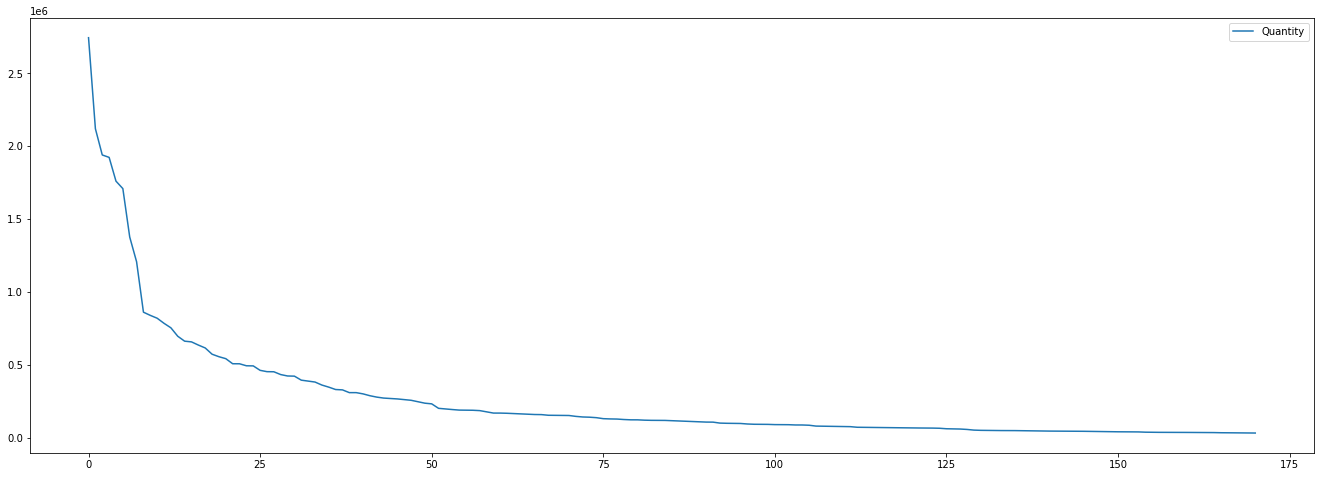

In [187]:
Number_of_products_ordered_C4_sum[Number_of_products_ordered_C4_sum['Quantity']>30000].plot( y='Quantity')

<AxesSubplot:xlabel='Category4Id'>

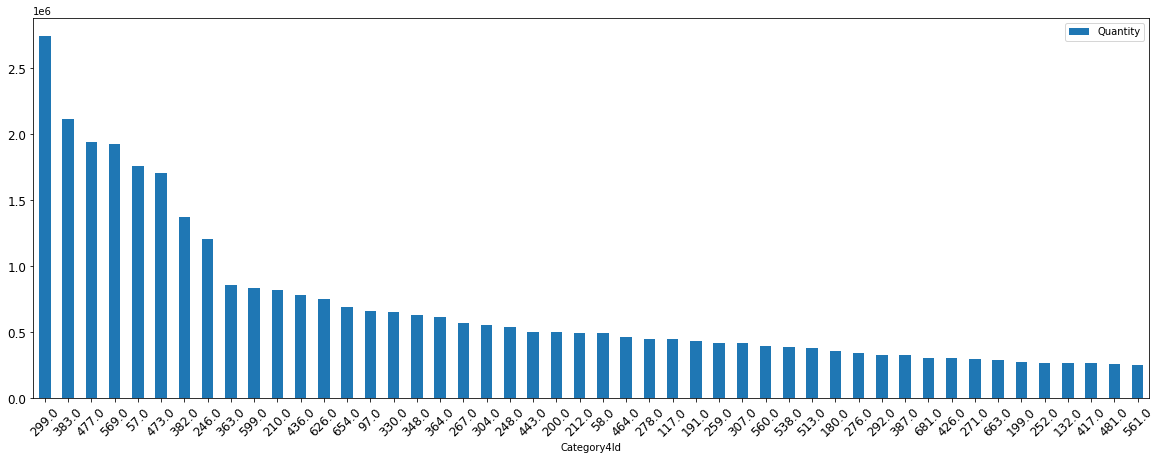

In [191]:
Number_of_products_ordered_C4_sum[Number_of_products_ordered_C4_sum['Quantity']>250000].plot.bar(x = 'Category4Id' , y='Quantity', grid=False, rot=45, fontsize=12 , figsize=(20,7))

<AxesSubplot:xlabel='Category4Id'>

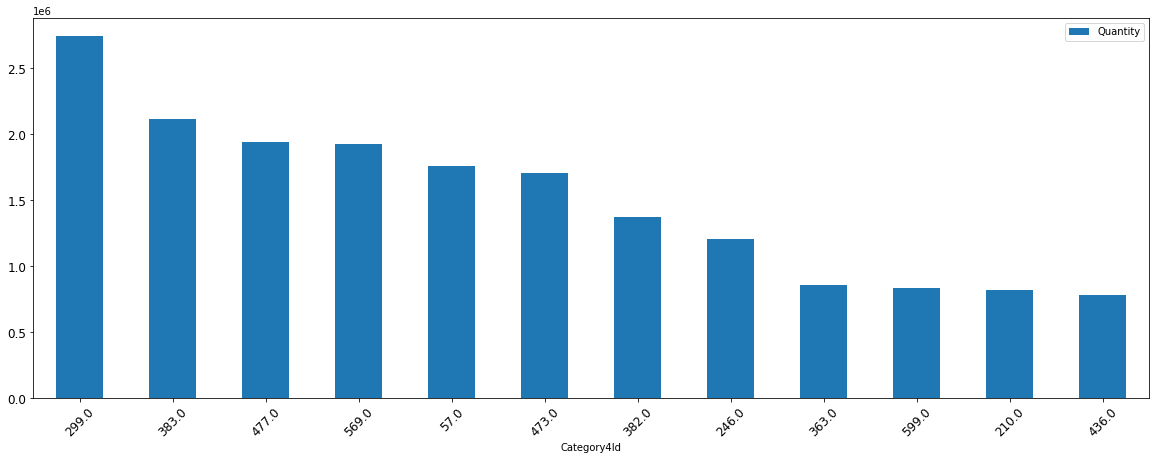

In [249]:
Number_of_products_ordered_C4_sum[Number_of_products_ordered_C4_sum['Quantity']>770000].plot.bar(x = 'Category4Id' , y='Quantity', grid=False, rot=45, fontsize=12 , figsize=(20,7))

In [123]:
Number_of_products_ordered_C4_sum_names = Number_of_products_ordered_C4_sum_names.groupby('Category4Id').agg({'Category4Name':'first' , 'percent':'first','PID':'first'}).reset_index()

In [124]:
Number_of_products_ordered_C4_sum_names.sort_values(by='Category4Id')

,Category4Id,Category4Name,percent,PID
0,57.0,پودر و قرص لباسشویی,3.695049,"66309,147464,13242,66308,14460,185916,185915,1..."
1,58.0,چای سیاه,1.032578,"683,12570,12569,110,2115,11244,18389,11976,976..."
2,70.0,پودر دسر,0.148073,"671,670,406,17905,17891,15946,14569,15948,1456..."
3,80.0,صابون و پودر صابون,0.094976,"1073,43498,1074,6209,142860,172258,145598,1731..."
4,97.0,مایعات ظرفشویی,1.388901,"179344,185926,11666,185922,11665,185163,189274..."
...,...,...,...,...
649,1409.0,پاستا,0.023600,"17900,17903,17906,149910,182543"
650,1410.0,سالاد سبزیجات,0.000097,190183
651,1415.0,ازگیل,0.000166,190453
652,1416.0,طناب,0.000002,189568


In [125]:
Number_of_products_ordered_C4_sum_names = Number_of_products_ordered_C4_sum_names.sort_values(by='percent',ascending=False).reset_index(drop=True)

In [94]:
Number_of_products_ordered_C4_sum_names = Number_of_products_ordered_C4_sum_names.drop(columns='PID')

In [95]:
Number_of_products_ordered_C4_sum_names.to_csv('Number_of_products_ordered_C4_sum_names.csv' , index=False , header=True)

In [203]:
Number_of_products_ordered_C4_sum_names.head(20)

,Category4Id,Category4Name,percent,list,pi,DI
0,299.0,نوشابه,5.763066,"[428, 17148, 17151, 430, 3002, 17227, 1225, 17...","[0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.012...",4.327251
1,383.0,بیسکویت,4.450633,"[219, 8972, 1681, 13834, 2423, 11624, 224, 165...","[0.002386634844868735, 0.002386634844868735, 0...",6.023461
2,477.0,کیک,4.072876,"[423, 150291, 13837, 182425, 182427, 16751, 11...","[0.0049504950495049506, 0.0049504950495049506,...",5.281989
3,569.0,ماکارونی,4.037904,"[150322, 15556, 6018, 15976, 408, 2059, 391, 3...","[0.0045871559633027525, 0.0045871559633027525,...",5.359796
4,57.0,پودر و قرص لباسشویی,3.695049,"[66309, 147464, 13242, 66308, 14460, 185916, 1...","[0.009433962264150943, 0.009433962264150943, 0...",4.619444
5,473.0,چیپس,3.587809,"[30690, 3279, 2865, 12816, 2864, 16754, 13017,...","[0.009433962264150943, 0.009433962264150943, 0...",4.619444
6,382.0,پنیر صبحانه,2.890187,"[8068, 11333, 2936, 1999, 9346, 2116, 2365, 34...","[0.005128205128205128, 0.005128205128205128, 0...",5.245959
7,246.0,اسنک,2.533984,"[2424, 13304, 146955, 2072, 6022, 8888, 2861, ...","[0.011764705882352941, 0.011764705882352941, 0...",4.390385
8,363.0,ماءالشعیر,1.806794,"[21943, 21946, 21950, 4844, 4845, 197, 18026, ...","[0.006289308176100629, 0.006289308176100629, 0...",5.037024
9,599.0,ویفر,1.760678,"[18, 150298, 1588, 13608, 399, 150297, 9511, 1...","[0.005952380952380952, 0.005952380952380952, 0...",5.093464


### Note: 
This is the percent of these categories ordered in total. It's not the basket analysis

In [129]:
# Done and commented
Number_of_products_ordered_C4_sum_names['list'] = Number_of_products_ordered_C4_sum_names['PID'].apply(lambda x: Convert(x))

In [130]:
Number_of_products_ordered_C4_sum_names = Number_of_products_ordered_C4_sum_names.drop(columns = ['PID'])

In [131]:
Number_of_products_ordered_C4_sum_names.head()

,Category4Id,Category4Name,percent,list
0,299.0,نوشابه,5.763066,"[428, 17148, 17151, 430, 3002, 17227, 1225, 17..."
1,383.0,بیسکویت,4.450633,"[219, 8972, 1681, 13834, 2423, 11624, 224, 165..."
2,477.0,کیک,4.072876,"[423, 150291, 13837, 182425, 182427, 16751, 11..."
3,569.0,ماکارونی,4.037904,"[150322, 15556, 6018, 15976, 408, 2059, 391, 3..."
4,57.0,پودر و قرص لباسشویی,3.695049,"[66309, 147464, 13242, 66308, 14460, 185916, 1..."


## The popularity of Category 4 between the customers

In [204]:
Number_of_baskets_unique_customer

,ProductId,BasketsCount,UniqueCustomersCount,percent_basket,percent_customers,Product
0,428,220468,172551,4.138642,3.239141,نوشابه خانواده 1500 سی سی کوکا کولا
1,8068,115149,89064,2.161586,1.671916,پنیر فتا 400 گرمی هراز
2,2424,98356,82645,1.846346,1.551418,کرانچی پنیری بزرگ چی توز
3,18157,90428,79066,1.697521,1.484233,پنیر پیتزا پروسس رنده شده 500 گرمی 206
4,9787,88753,78045,1.666078,1.465067,رب گوجه فرنگی 800 گرمی رعنا
...,...,...,...,...,...,...
17473,180823,1,1,0.000019,0.000019,مسواک کودک طراحی شده مخصوص 6 تا 12 سال کانفیدنت
17474,175787,1,1,0.000019,0.000019,زیرانداز کیفی مایا
17475,15642,1,1,0.000019,0.000019,پاپس چیپس رژیمی با پنیر چدار و خامه 55 گرمی چی...
17476,173021,1,1,0.000019,0.000019,لاک ناخن شاین تک( شماره 66 ) 10 میلی لیتری کال...


In [205]:
Number_of_products_ordered_C4

,index,ProductId,Quantity,percent,Category4Id,PID
0,0,428,594032,1.247345,299.0,428
1,1,17148,453720,0.952719,299.0,17148
2,2,18,271710,0.570535,599.0,18
3,3,17151,230913,0.484870,299.0,17151
4,4,219,197994,0.415747,383.0,219
...,...,...,...,...,...,...
17219,17473,172943,1,0.000002,1053.0,172943
17220,17474,56948,1,0.000002,1375.0,56948
17221,17475,172872,1,0.000002,117.0,172872
17222,17476,172805,1,0.000002,1053.0,172805


In [206]:
Number_of_baskets_unique_customer_C4 = pd.merge(left=Number_of_baskets_unique_customer , right=Cat4 , left_on='ProductId' , right_on='ProductId')

In [207]:
Number_of_baskets_unique_customer_C4.percent_basket.sum()

545.9602208422242

In [208]:
# Cat4

In [209]:
Number_of_baskets_unique_customer_C4['PID'] = Number_of_baskets_unique_customer_C4['ProductId'].apply(str)

In [210]:
Number_of_baskets_unique_customer_C4 = Number_of_baskets_unique_customer_C4.groupby('Category4Id').agg({'BasketsCount':'sum' , 'percent_basket':'sum' , 'PID':lambda x: ','.join(x)}).reset_index()

In [211]:
Number_of_baskets_unique_customer_C4

,Category4Id,BasketsCount,percent_basket,PID
0,57.0,720400,13.523404,"147464,66309,66308,13242,14460,21574,185916,18..."
1,58.0,411755,7.729497,"683,12570,11244,12569,110,2115,18389,976,975,9..."
2,70.0,50707,0.951876,"671,670,406,17905,17891,15946,14569,15948,1456..."
3,80.0,31030,0.582498,"1073,43498,1074,6209,172258,142860,173145,1455..."
4,97.0,513409,9.637753,"185926,11666,179344,185163,189274,11665,11231,..."
...,...,...,...,...
649,1409.0,7836,0.147098,"17900,17903,17906,149910,182543"
650,1410.0,36,0.000676,190183
651,1415.0,74,0.001389,190453
652,1416.0,1,0.000019,189568


In [212]:
Number_of_baskets_unique_customer_C4_names = pd.merge(left=Number_of_baskets_unique_customer_C4 , right=Cat4_names , left_on='Category4Id' , right_on='Category4Id')

In [213]:
# Number_of_baskets_unique_customer_C4_names = Number_of_baskets_unique_customer_C4_names.groupby('Category4Id').agg({'percent_basket':'first' , 'Category4Name':'first'}).reset_index()

In [214]:
Number_of_baskets_unique_customer_C4_names.sort_values(by='percent_basket',ascending=False)

,Category4Id,BasketsCount,percent_basket,PID,Category4Name
13573,473.0,1070629,20.097930,"30690,3279,2865,12816,2864,2867,16754,3189,327...",چیپس
13478,473.0,1070629,20.097930,"30690,3279,2865,12816,2864,2867,16754,3189,327...",چیپس
13484,473.0,1070629,20.097930,"30690,3279,2865,12816,2864,2867,16754,3189,327...",چیپس
13483,473.0,1070629,20.097930,"30690,3279,2865,12816,2864,2867,16754,3189,327...",چیپس
13482,473.0,1070629,20.097930,"30690,3279,2865,12816,2864,2867,16754,3189,327...",چیپس
...,...,...,...,...,...
22740,1084.0,1,0.000019,175531,رنگ موی
22741,1084.0,1,0.000019,175531,رنگ موی
22742,1084.0,1,0.000019,175531,رنگ موی
22743,1084.0,1,0.000019,175531,رنگ موی


In [215]:
Number_of_baskets_unique_customer_C4_names = Number_of_baskets_unique_customer_C4_names.groupby('Category4Id').agg({'BasketsCount':'first','percent_basket':'first','Category4Name':'first'})

In [216]:
Number_of_baskets_unique_customer_C4_names = Number_of_baskets_unique_customer_C4_names.sort_values(by='percent_basket',ascending=False).reset_index()

In [145]:
Number_of_baskets_unique_customer_C4_names.head(50)

,Category4Id,BasketsCount,percent_basket,Category4Name
0,473.0,1070629,20.097930,چیپس
1,383.0,1046886,19.652225,بیسکویت
2,382.0,1036479,19.456864,پنیر صبحانه
3,569.0,1025690,19.254332,ماکارونی
4,246.0,734199,13.782440,اسنک
5,57.0,720400,13.523404,پودر و قرص لباسشویی
6,477.0,660803,12.404645,کیک
7,299.0,629219,11.811748,نوشابه
8,97.0,513409,9.637753,مایعات ظرفشویی
9,348.0,484372,9.092669,شامپو


<AxesSubplot:>

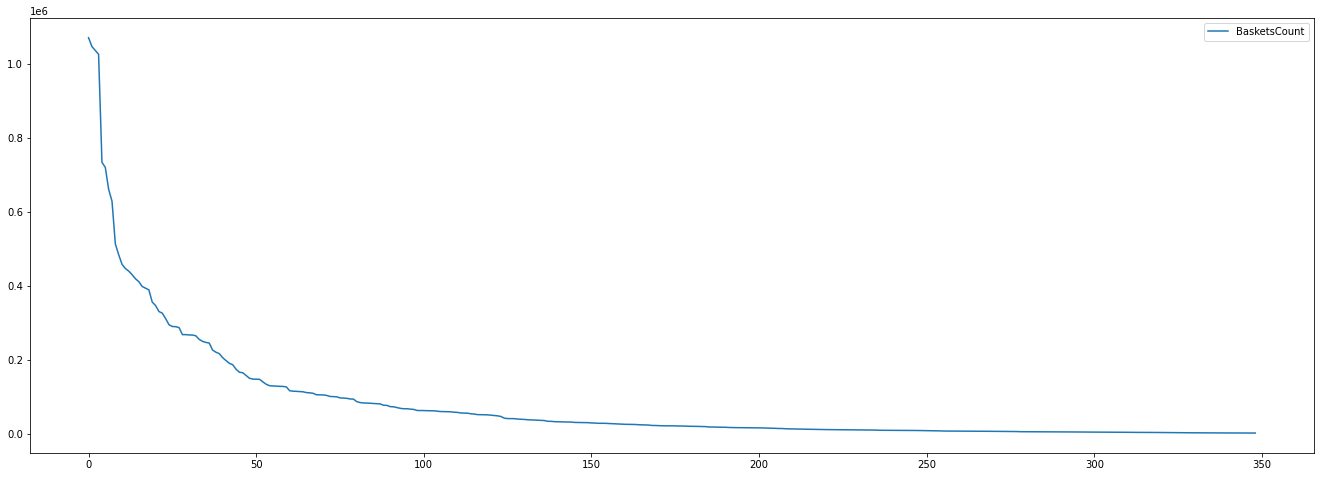

In [220]:
Number_of_baskets_unique_customer_C4_names[Number_of_baskets_unique_customer_C4_names['BasketsCount']>3000].plot( y='BasketsCount')

<AxesSubplot:xlabel='Category4Id'>

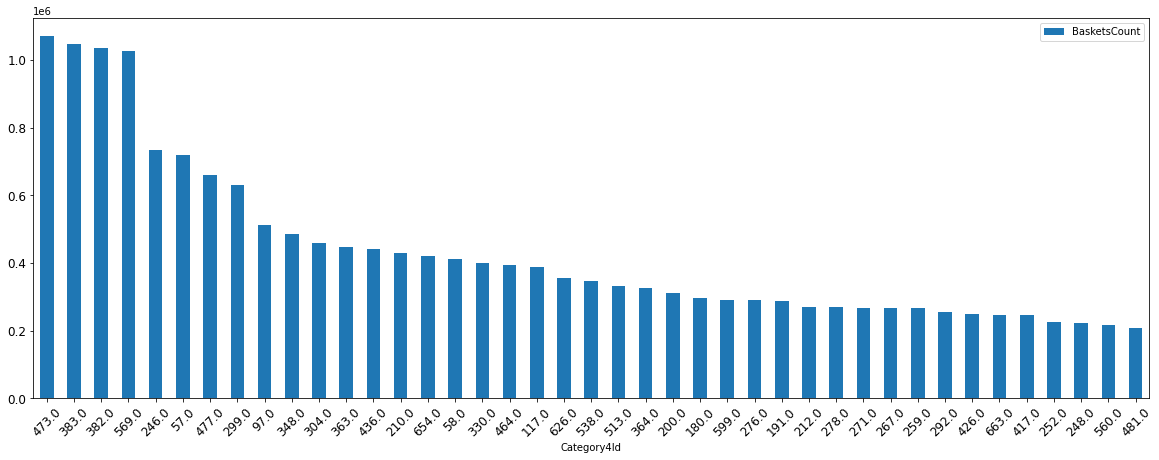

In [225]:
Number_of_baskets_unique_customer_C4_names[Number_of_baskets_unique_customer_C4_names['BasketsCount']>200000].plot.bar(x = 'Category4Id' , y='BasketsCount', grid=False, rot=45, fontsize=12 , figsize=(20,7))

<AxesSubplot:xlabel='Category4Id'>

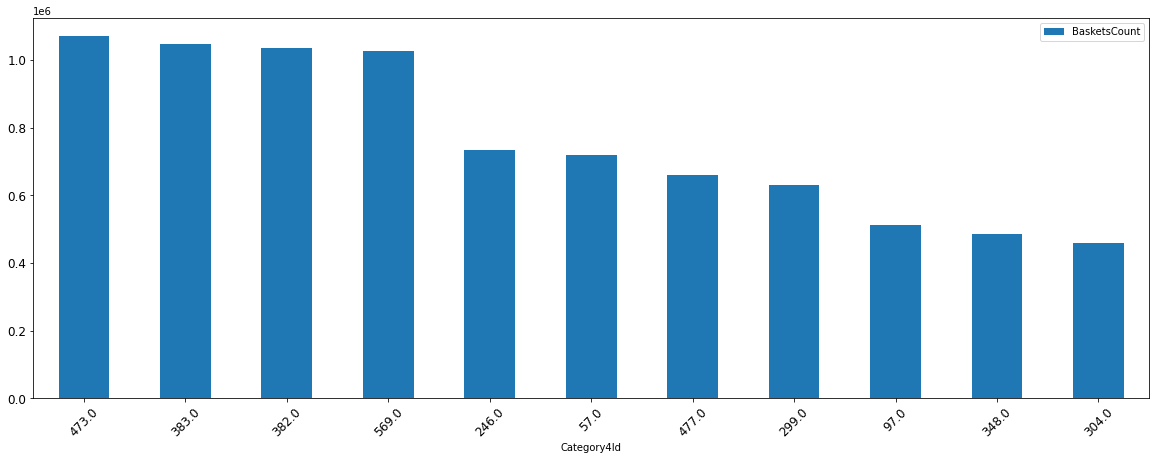

In [251]:
Number_of_baskets_unique_customer_C4_names[Number_of_baskets_unique_customer_C4_names['BasketsCount']>450000].plot.bar(x = 'Category4Id' , y='BasketsCount', grid=False, rot=45, fontsize=12 , figsize=(20,7))

In [218]:
Number_of_baskets_unique_customer_C4_names.percent_basket.sum()

545.9602208422244

In [146]:
Number_of_baskets_unique_customer_C4_names.to_csv('Number_of_baskets_unique_customer_C4_names.csv' , index=False , header=True)

## Diversity index of products in the categories ordered

In [147]:
def pi(List):
    p = []
    for i in range(len(List)):
        p.append(List.count(List[i])/len(List))
    return p 

In [148]:
Number_of_products_ordered_C4_sum_names['pi'] = Number_of_products_ordered_C4_sum_names['list'].apply(lambda x: pi(x))

In [149]:
def DI(p):
    DI = 0
    for i in range(len(p)-1):
        DI += -p[i]*np.log(p[i])
    return DI

In [150]:
Number_of_products_ordered_C4_sum_names = Number_of_products_ordered_C4_sum_names.reset_index()

In [151]:
Number_of_products_ordered_C4_sum_names = Number_of_products_ordered_C4_sum_names.drop(columns=['index'])

In [152]:
Number_of_products_ordered_C4_sum_names.head()
# = Number_of_products_ordered_C4_sum_names.drop(columns='pi')

,Category4Id,Category4Name,percent,list,pi
0,299.0,نوشابه,5.763066,"[428, 17148, 17151, 430, 3002, 17227, 1225, 17...","[0.0125, 0.0125, 0.0125, 0.0125, 0.0125, 0.012..."
1,383.0,بیسکویت,4.450633,"[219, 8972, 1681, 13834, 2423, 11624, 224, 165...","[0.002386634844868735, 0.002386634844868735, 0..."
2,477.0,کیک,4.072876,"[423, 150291, 13837, 182425, 182427, 16751, 11...","[0.0049504950495049506, 0.0049504950495049506,..."
3,569.0,ماکارونی,4.037904,"[150322, 15556, 6018, 15976, 408, 2059, 391, 3...","[0.0045871559633027525, 0.0045871559633027525,..."
4,57.0,پودر و قرص لباسشویی,3.695049,"[66309, 147464, 13242, 66308, 14460, 185916, 1...","[0.009433962264150943, 0.009433962264150943, 0..."


In [153]:
Number_of_products_ordered_C4_sum_names['DI'] = Number_of_products_ordered_C4_sum_names['pi'].apply(lambda x: DI(x))

In [154]:
Number_of_products_ordered_C4_sum_names_DI = Number_of_products_ordered_C4_sum_names.drop(columns=['pi','list','Category4Id'])

In [159]:
Number_of_products_ordered_C4_sum_names_DI.to_csv('Number_of_products_ordered_C4_sum_names_DI.csv' , index=False, header=True)

In [253]:
Number_of_products_ordered_C4_sum_names_DI.percent.sum()

99.51500402299746

The first 30 popular categories

In [157]:
First_Number_of_products_ordered_C4_sum_names = Number_of_products_ordered_C4_sum_names.loc[0:29]

58.754159221668104

The list of products bought in each category

In [161]:
Data2020_3rep

,OrderId,list,OrderPartId,CustomerId,StoreId,CreateOn,ProductId,Quantity,year,month,day,DataBlock
0,1491929,"['11530', '149900', '149898', '166700', '16671...",1152805,631713,1959,20200301,11530,1.0,2020,3,1,27
1,1491929,"['11530', '149900', '149898', '166700', '16671...",1152805,631713,1959,20200301,149900,1.0,2020,3,1,27
2,1491929,"['11530', '149900', '149898', '166700', '16671...",1152805,631713,1959,20200301,149898,1.0,2020,3,1,27
3,1491929,"['11530', '149900', '149898', '166700', '16671...",1152805,631713,1959,20200301,166700,1.0,2020,3,1,27
4,1491929,"['11530', '149900', '149898', '166700', '16671...",1152805,631713,1959,20200301,166710,1.0,2020,3,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...
47623689,8859364,"['8993', '21404', '11510', '11510']",8505615,4829912,5114,20210115,11510,2.0,2021,1,15,37
47623690,8860270,"['189597', '3525', '8654', '8654']",8506520,3824408,2441,20210115,189597,1.0,2021,1,15,37
47623691,8860270,"['189597', '3525', '8654', '8654']",8506520,3824408,2441,20210115,3525,1.0,2021,1,15,37
47623692,8860270,"['189597', '3525', '8654', '8654']",8506520,3824408,2441,20210115,8654,2.0,2021,1,15,37


In [162]:
Data2020_3rep_C4 = pd.merge(left=Data2020_3rep , right=Cat4 , left_on='ProductId' , right_on='ProductId')

In [163]:
a = Data2020_3rep_C4[Data2020_3rep_C4['Category4Id']==299]

In [164]:
Data2020_3rep_C4

,OrderId,list,OrderPartId,CustomerId,StoreId,CreateOn,ProductId,Quantity,year,month,day,DataBlock,Category4Id,Category4Name
0,1491929,"['11530', '149900', '149898', '166700', '16671...",1152805,631713,1959,20200301,11530,1.0,2020,3,1,27,648.0,پاستیل
1,1492119,"['8276', '150123', '150123', '150123', '150123...",1152995,629207,1973,20200301,11530,3.0,2020,3,1,27,648.0,پاستیل
2,1492119,"['8276', '150123', '150123', '150123', '150123...",1152995,629207,1973,20200301,11530,3.0,2020,3,1,27,648.0,پاستیل
3,1492119,"['8276', '150123', '150123', '150123', '150123...",1152995,629207,1973,20200301,11530,3.0,2020,3,1,27,648.0,پاستیل
4,1492691,"['13779', '13779', '22183', '150304', '181177'...",1153567,632962,1973,20200301,11530,2.0,2020,3,1,27,648.0,پاستیل
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47392716,8815991,"['953', '953', '13837', '620', '110']",8462293,218000,2046,20210115,953,2.0,2021,1,15,37,467.0,کالباس مرغ و بوقلمون
47392717,8815991,"['953', '953', '13837', '620', '110']",8462293,218000,2046,20210115,953,2.0,2021,1,15,37,467.0,کالباس مرغ و بوقلمون
47392718,8828223,"['9122', '3273', '3273', '13837', '953', '1623...",8474513,2043017,2086,20210115,953,1.0,2021,1,15,37,467.0,کالباس مرغ و بوقلمون
47392719,8849051,"['428', '144083', '15427', '953', '3255', '146...",8495312,3478835,2287,20210115,953,1.0,2021,1,15,37,467.0,کالباس مرغ و بوقلمون


In [168]:
Data2020_3rep_C4['C4ID'] = Data2020_3rep_C4['Category4Id'].apply(str)

In [171]:
Data2020_3rep_C4['PID'] = Data2020_3rep_C4['ProductId'].apply(str)

In [172]:
Data2020_3rep_C4_PIDs = Data2020_3rep_C4.groupby('Category4Id').agg({'PID':lambda x: ','.join(x) , 'Category4Name':'first','C4ID':'count',}).reset_index()

In [173]:
Data2020_3rep_C4_PIDs = Data2020_3rep_C4_PIDs.sort_values(by='C4ID',ascending = False)

In [174]:
Data2020_3rep_C4_PIDs['C4Products_list'] = Data2020_3rep_C4_PIDs['PID'].apply(lambda x: Convert(x)).reset_index(drop=True)

In [175]:
Data2020_3rep_C4_PIDs = Data2020_3rep_C4_PIDs.drop(columns=['PID']).rename(columns={'C4ID':'C4ItemsCount'})

In [176]:
Data2020_3rep_C4_PIDs

,Category4Id,Category4Name,C4ItemsCount,C4Products_list
110,299.0,نوشابه,2744585,"[172658, 172658, 172658, 172658, 172658, 17265..."
171,383.0,بیسکویت,2119556,"[21334, 21334, 21334, 21334, 21334, 21334, 213..."
239,477.0,کیک,1939654,"[145140, 145140, 145140, 145140, 145140, 14514..."
304,569.0,ماکارونی,1922999,"[529, 529, 529, 529, 529, 529, 529, 529, 529, ..."
0,57.0,پودر و قرص لباسشویی,1759719,"[21933, 21933, 21933, 21933, 21933, 21933, 219..."
...,...,...,...,...
427,1084.0,رنگ موی,1,"[186172, 186172, 186172, 186172, 186172, 18617..."
234,472.0,روان نویس,1,"[177766, 177766, 177766, 177766, 177766, 17776..."
528,1236.0,سیر داغ,1,"[173449, 173449, 173449, 173446, 173446, 17344..."
432,1094.0,کرم روشن کننده,1,"[179171, 179171, 179171, 179171, 179171, 17917..."


In [177]:
First_Data2020_3rep_C4_PIDs = Data2020_3rep_C4_PIDs.loc[:]

In [178]:
First_Data2020_3rep_C4_PIDs

,Category4Id,Category4Name,C4ItemsCount,C4Products_list
110,299.0,نوشابه,2744585,"[172658, 172658, 172658, 172658, 172658, 17265..."
171,383.0,بیسکویت,2119556,"[21334, 21334, 21334, 21334, 21334, 21334, 213..."
239,477.0,کیک,1939654,"[145140, 145140, 145140, 145140, 145140, 14514..."
304,569.0,ماکارونی,1922999,"[529, 529, 529, 529, 529, 529, 529, 529, 529, ..."
0,57.0,پودر و قرص لباسشویی,1759719,"[21933, 21933, 21933, 21933, 21933, 21933, 219..."
...,...,...,...,...
427,1084.0,رنگ موی,1,"[186172, 186172, 186172, 186172, 186172, 18617..."
234,472.0,روان نویس,1,"[177766, 177766, 177766, 177766, 177766, 17776..."
528,1236.0,سیر داغ,1,"[173449, 173449, 173449, 173446, 173446, 17344..."
432,1094.0,کرم روشن کننده,1,"[179171, 179171, 179171, 179171, 179171, 17917..."


In [180]:
# First_Data2020_3rep_C4_PIDs['pi']=First_Data2020_3rep_C4_PIDs['C4Products_list'].apply(lambda x: pi(x))

In [181]:
# First_Data2020_3rep_C4_PIDs['DI'] = First_Data2020_3rep_C4_PIDs['pi'].apply(lambda x: DI(x))

In [182]:
# First_Data2020_3rep_C4_PIDs = First_Data2020_3rep_C4_PIDs.drop(columns=['pi'])

In [183]:
First_Data2020_3rep_C4_PIDs

,Category4Id,Category4Name,C4ItemsCount,C4Products_list
110,299.0,نوشابه,2744585,"[172658, 172658, 172658, 172658, 172658, 17265..."
171,383.0,بیسکویت,2119556,"[21334, 21334, 21334, 21334, 21334, 21334, 213..."
239,477.0,کیک,1939654,"[145140, 145140, 145140, 145140, 145140, 14514..."
304,569.0,ماکارونی,1922999,"[529, 529, 529, 529, 529, 529, 529, 529, 529, ..."
0,57.0,پودر و قرص لباسشویی,1759719,"[21933, 21933, 21933, 21933, 21933, 21933, 219..."
...,...,...,...,...
427,1084.0,رنگ موی,1,"[186172, 186172, 186172, 186172, 186172, 18617..."
234,472.0,روان نویس,1,"[177766, 177766, 177766, 177766, 177766, 17776..."
528,1236.0,سیر داغ,1,"[173449, 173449, 173449, 173446, 173446, 17344..."
432,1094.0,کرم روشن کننده,1,"[179171, 179171, 179171, 179171, 179171, 17917..."


In [184]:
for i in range(First_Data2020_3rep_C4_PIDs.shape[0]):
    unique_counts = np.unique(First_Data2020_3rep_C4_PIDs.loc[i]['C4Products_list'],return_counts=True)
    a = zip(unique_counts[0] , unique_counts[1] , [First_Data2020_3rep_C4_PIDs.loc[i]['Category4Name']]*len(unique_counts[0]), [First_Data2020_3rep_C4_PIDs.loc[i]['Category4Id']]*len(unique_counts[0]))
    locals()['Cat4_'+str(i)] = pd.DataFrame(a,columns=['PID' , 'Count' , 'Category4Name' , 'Category4Id'])
    SUM = locals()['Cat4_'+str(i)]['Count'].sum()
    locals()['Cat4_'+str(i)]['percent'] = round(locals()['Cat4_'+str(i)]['Count']*100/SUM , 1)
    locals()['Cat4_'+str(i)]['ProductId'] = locals()['Cat4_'+str(i)]['PID'].apply(int)
    locals()['Cat4_'+str(i)] = pd.merge(left = locals()['Cat4_'+str(i)] ,
                                                    right= Product_names , 
                                                    left_on='ProductId' , 
                                                    right_on = 'ProductId').sort_values(by='percent',ascending=False).reset_index(drop=True)

In [392]:
# for i in range(First_Data2020_3rep_C4_PIDs.shape[0]):
#     locals()['Cat4_'+str(i)].to_csv('Cat4_'+str(i)+'.csv', index = False, header=True)

In [385]:
Cat4_0.to_csv('Cat4_'+str(1)+'.csv', index = False, header=True)

In [350]:
df

,PID,Count,percent,ProductId,Product
0,428,594032,21.6,428,نوشابه خانواده 1500 سی سی کوکا کولا
1,17148,453720,16.5,17148,نوشابه قوطی 330 سی سی پپسی
2,17151,230913,8.4,17151,نوشابه 300 سی سی پپسی
3,430,171712,6.3,430,نوشابه پت 300 سی سی کوکاکولا
4,3002,143814,5.2,3002,نوشابه کولا 1500 سی سی کانادا درای
...,...,...,...,...,...
75,207,398,0.0,207,نوشابه لیمویی خانواده 1.5 لیتری فانتا
76,21608,545,0.0,21608,نوشابه گازدار آلبالو 250سی سی آیسی مانکی
77,21642,1328,0.0,21642,نوشابه گازدار بلوهاوایی 250سی سی آیسی مانکی
78,21686,614,0.0,21686,نوشابه گازدار سیب کیوی 250سی سی آیسی مانکی


In [358]:
type(First_Data2020_3rep_C4_PIDs.loc[0]['Category4Id'])

numpy.float64

In [293]:
unique_counts = np.unique(First_Data2020_3rep_C4_PIDs['C4Products_list'][0],return_counts=True)

In [229]:
# a = zip(unique_counts[0] , unique_counts[1])

In [309]:
# a = list(zip(unique_counts[0] , unique_counts[1]))

In [310]:
# Cat4_299 = pd.DataFrame(a,columns=['PID' , 'Count'])

In [312]:
# Cat4_299 = Cat4_299.sort_values(by='Count' , ascending=False)

In [313]:
# Cat4_299

,PID,Count
62,428,594032
10,17148,453720
11,17151,230913
64,430,171712
56,3002,143814
...,...,...
34,189910,5
69,703,4
68,58317,3
28,187614,2


In [317]:
Cat4_299['percent'] = round(Cat4_299['Count']*100/Cat4_299['Count'].sum() , 1)

In [324]:
Cat4_299['ProductId'] = Cat4_299['PID'].apply(int)

In [325]:
Cat4_299 = pd.merge(left = Cat4_299 ,right= Product_names , left_on='ProductId' , right_on = 'ProductId').reset_index(drop=True)

In [326]:
Cat4_299

,PID,Count,percent,ProductId,Product
0,428,594032,21.6,428,نوشابه خانواده 1500 سی سی کوکا کولا
1,17148,453720,16.5,17148,نوشابه قوطی 330 سی سی پپسی
2,17151,230913,8.4,17151,نوشابه 300 سی سی پپسی
3,430,171712,6.3,430,نوشابه پت 300 سی سی کوکاکولا
4,3002,143814,5.2,3002,نوشابه کولا 1500 سی سی کانادا درای
...,...,...,...,...,...
75,189910,5,0.0,189910,نوشابه پرتقالی شیشه 250 میلی لیتری فانتا
76,703,4,0.0,703,سینرژی بهنوش
77,58317,3,0.0,58317,نوشابه گازدار بلوتروپیکال 1 لیتری بهنوش
78,187614,2,0.0,187614,نوشابه لیمویی شیشه 250 میلی لیتری اسپرایت


In [233]:
# for i in range(First_Data2020_3rep_C4_PIDs.shape[0]):
#     locals()['Cat4_'+str(i)].to_csv('Cat4_'+str(i)+'.csv', index = False, header=True)

In [234]:
for i in range(10):
    locals()['Cat4_'+str(i)] = pd.read_csv('Cat4_'+str(i)+'.csv')

In [235]:
Cat4_0.head(10)

,PID,Count,Category4Name,Category4Id,percent,ProductId,Product
0,428,594032,نوشابه,299.0,21.6,428,نوشابه خانواده 1500 سی سی کوکا کولا
1,17148,453720,نوشابه,299.0,16.5,17148,نوشابه قوطی 330 سی سی پپسی
2,17151,230913,نوشابه,299.0,8.4,17151,نوشابه 300 سی سی پپسی
3,430,171712,نوشابه,299.0,6.3,430,نوشابه پت 300 سی سی کوکاکولا
4,3002,143814,نوشابه,299.0,5.2,3002,نوشابه کولا 1500 سی سی کانادا درای
5,17227,133712,نوشابه,299.0,4.9,17227,نوشابه 1500 سی سی پپسی
6,1225,120378,نوشابه,299.0,4.4,1225,نوشابه قوطی 330 سی سی کوکاکولا
7,159,76279,نوشابه,299.0,2.8,159,نوشابه 1500 سی سی اسپرایت
8,17253,77994,نوشابه,299.0,2.8,17253,نوشابه قوطی پرتقالی 330 سی سی میراندا
9,3003,74885,نوشابه,299.0,2.7,3003,نوشابه پرتقالی 1500 سی سی کانادا درای


In [236]:
Cat4_1.head(10)

,PID,Count,Category4Name,Category4Id,percent,ProductId,Product
0,219,197994,بیسکویت,383.0,9.3,219,بیسکوییت ساقه طلایی 200 گرمی مینو
1,8972,89271,بیسکویت,383.0,4.2,8972,بیسکوییت مغزدار های بای 95 گرمی شیرین عسل
2,1681,84404,بیسکویت,383.0,4.0,1681,بیسکویت ترد نمکی بزرگ 75 گرمی مینو
3,13834,76577,بیسکویت,383.0,3.6,13834,بیسکویت روکشدار والس گیلاس 25 گرمی شیرین عسل
4,2423,65014,بیسکویت,383.0,3.1,2423,بیسکویت نان روغنی 50 گرمی سالمین
5,11624,63224,بیسکویت,383.0,3.0,11624,بیسکویت کرمدار شکلاتی تیویکا 85 گرمی ویتانا
6,224,59020,بیسکویت,383.0,2.8,224,بیسکوییت کرمدار ساقه طلایی 192 گرمی مینو
7,16560,48413,بیسکویت,383.0,2.3,16560,بیسکویت تارت قلبی کاکائویی 64 گرمی ویتانا
8,2071,43538,بیسکویت,383.0,2.1,2071,چمک پرتقال 35 گرمی آناتا
9,1199,43189,بیسکویت,383.0,2.0,1199,بیسکوییت پتی بور وانیل 125 گرمی شیرین عسل


In [237]:
Cat4_3.head(10)

,PID,Count,Category4Name,Category4Id,percent,ProductId,Product
0,150322,168225,ماکارونی,569.0,8.7,150322,ماکارونی 700 گرمی رشد\r\n
1,15556,103990,ماکارونی,569.0,5.4,15556,اسپاگتی 1.2 رشته ای 500 گرمی زر
2,6018,98891,ماکارونی,569.0,5.1,6018,اسپاگتی 1.2 رشته ای 700 گرمی زر
3,15976,96051,ماکارونی,569.0,5.0,15976,اسپاگتی 1.2 رشته ای 700 گرمی مانا
4,408,87106,ماکارونی,569.0,4.5,408,ماکارونی پیگولی 500 گرمی زر
5,2059,80839,ماکارونی,569.0,4.2,2059,ماکارونی 2.5 رشته ای 500 گرمی زر
6,391,75149,ماکارونی,569.0,3.9,391,اسپاگتی 1.5 رشته ای 700 گرمی زر
7,3272,54987,ماکارونی,569.0,2.9,3272,اسپاگتی 1.2 رشته ای 700 گرمی مک
8,17775,48394,ماکارونی,569.0,2.5,17775,ماکارونی 1.2 رشته ای 700 گرمی جهان
9,389,48666,ماکارونی,569.0,2.5,389,ماکارونی فرمی شلز500 گرمی زر


In [238]:
Cat4_4.head(10)

,PID,Count,Category4Name,Category4Id,percent,ProductId,Product
0,66309,146940,پودر و قرص لباسشویی,57.0,8.4,66309,پودر ماشین لباسشویی بدون فسفات 500 گرمی گلرنگ
1,147464,117794,پودر و قرص لباسشویی,57.0,6.7,147464,پودر ماشین لباسشویی کامل و درخشان 500گرمی سافت...
2,13242,117211,پودر و قرص لباسشویی,57.0,6.7,13242,پودر لباسشویی ماشینی پلی واش 500 گرمی اکتیو
3,66308,112175,پودر و قرص لباسشویی,57.0,6.4,66308,پودر لباسشویی دستی بدون فسفات 500 گرمی گلرنگ
4,14460,99705,پودر و قرص لباسشویی,57.0,5.7,14460,پودر لباسشویی دستی محافظ رنگ 500 گرمی سافتلن
5,185916,70794,پودر و قرص لباسشویی,57.0,4.0,185916,پودر لباسشویی ماشینی یونیورسال 500 گرمی پرسیل
6,21574,68720,پودر و قرص لباسشویی,57.0,3.9,21574,پودر لباسشویی دستی پلاس 500 گرمی یکتا
7,185911,69215,پودر و قرص لباسشویی,57.0,3.9,185911,پودر لباسشویی دستی یونیورسال 500 گرمی پرسیل
8,185915,69415,پودر و قرص لباسشویی,57.0,3.9,185915,پودر لباسشویی ماشینی لاوندر 360 درجه500 گرمی پ...
9,18120,59207,پودر و قرص لباسشویی,57.0,3.4,18120,پودر لباسشویی دستی پلاس 500 گرمی تاپ


In [239]:
Cat4_5.head(10)

,PID,Count,Category4Name,Category4Id,percent,ProductId,Product
0,30690,137007,چیپس,473.0,8.0,30690,چیپس کچاپ متوسط 60 گرمی چی توز
1,3279,129053,چیپس,473.0,7.6,3279,کتل چیپس نمکی دریایی 60 گرمی چی توز
2,2865,118731,چیپس,473.0,6.9,2865,چیپس سرکه متوسط 60 گرمی چی توز
3,12816,99447,چیپس,473.0,5.8,12816,چیپس ماست و ریحان 55 گرمی چاکلز
4,2864,86620,چیپس,473.0,5.1,2864,چیپس ساده60 گرمی چی توز
5,16754,73378,چیپس,473.0,4.3,16754,چیپس سرکه 55 گرمی چاکلز
6,13017,71392,چیپس,473.0,4.2,13017,چیپس نمکی 55 گرمی چاکلز
7,2867,66144,چیپس,473.0,3.9,2867,چیپس پیاز جعفری 60 گرمی چی توز
8,3277,64052,چیپس,473.0,3.7,3277,کتل چیپس سرکه بالزامیک 60 گرمی چی توز
9,3189,61863,چیپس,473.0,3.6,3189,چیپس پیاز و جعفری 60 گرمی مزمز


In [240]:
Cat4_6.head(10)

,PID,Count,Category4Name,Category4Id,percent,ProductId,Product
0,8068,136390,پنیر صبحانه,382.0,9.9,8068,پنیر فتا 400 گرمی هراز
1,11333,101617,پنیر صبحانه,382.0,7.4,11333,پنیر یواف بسته بندی کاوردار 400 گرمی صباح
2,2936,86137,پنیر صبحانه,382.0,6.3,2936,پنیر سفید450 گرمی پگاه
3,1999,66172,پنیر صبحانه,382.0,4.8,1999,پنیر نسبتا چرب 510گرمی روزانه
4,9346,65650,پنیر صبحانه,382.0,4.8,9346,پنیر سفید 400 گرمی پگاه
5,2116,63051,پنیر صبحانه,382.0,4.6,2116,پنیر لبنه 350 گرمی کاله
6,2365,51865,پنیر صبحانه,382.0,3.8,2365,پنیرنسبتا چرب طرح جدید 210 گرمی روزانه
7,3484,47226,پنیر صبحانه,382.0,3.4,3484,پنیر لاکتیکی 300 گرمی صباح
8,11518,45614,پنیر صبحانه,382.0,3.3,11518,پنیر فتا کم چرب کم نمک پروبیوتیک 300 گرمی هراز
9,16149,45189,پنیر صبحانه,382.0,3.3,16149,پنیر خامه ای ویلی 350 گرمی کاله


In [241]:
Cat4_7.head(10)

,PID,Count,Category4Name,Category4Id,percent,ProductId,Product
0,2424,165898,اسنک,246.0,13.7,2424,کرانچی پنیری بزرگ چی توز
1,13304,120808,اسنک,246.0,10.0,13304,اسنک طلایی ویژه 60 گرمی چی توز
2,146955,116381,اسنک,246.0,9.6,146955,اسنک طلایی پذیرایی 175 گرمی چی توز
3,2072,74436,اسنک,246.0,6.2,2072,اسنک پنیری 70 گرمی چاکلز
4,6022,64574,اسنک,246.0,5.4,6022,اسنک توپی ریز 20گرمی مزمز
5,8888,53042,اسنک,246.0,4.4,8888,اسنک چرخی ویژه 80 گرمی چی توز
6,2868,47234,اسنک,246.0,3.9,2868,اسنک موتوری پذیرایی 170 گرمی چی توز
7,2861,47472,اسنک,246.0,3.9,2861,اسنک موتوری خانواده 150 گرمی چی توز
8,13303,43376,اسنک,246.0,3.6,13303,استیک کچاپ ویژه 110 گرمی چی توز
9,3273,38409,اسنک,246.0,3.2,3273,اسنک طلایی خانواده 110 گرمی چی توز


In [242]:
Cat4_8.head(10)

,PID,Count,Category4Name,Category4Id,percent,ProductId,Product
0,21943,102843,ماءالشعیر,363.0,12.0,21943,ماالشعیر استوایی 1 لیتری هی دی
1,21946,91099,ماءالشعیر,363.0,10.6,21946,ماالشعیر هلو 1 لیتری هی دی
2,21950,75965,ماءالشعیر,363.0,8.8,21950,ماالشعیر لیمو یک لیتری هی دی
3,4844,57099,ماءالشعیر,363.0,6.6,4844,ماءالشعیر استوایی 1 لیتری جوجو
4,4845,42201,ماءالشعیر,363.0,4.9,4845,ماءالشعیر کلاسیک 1 لیتری جوجو
5,197,35631,ماءالشعیر,363.0,4.1,197,دلستر لیمویی 1500سی سی بهنوش
6,18026,29954,ماءالشعیر,363.0,3.5,18026,دلستر استوایی1500سی سی بهنوش
7,997,29477,ماءالشعیر,363.0,3.4,997,دلستر استوایی 1000 میلی لیتری بهنوش
8,996,24651,ماءالشعیر,363.0,2.9,996,دلستر لیمویی پت 1 لیتری بهنوش
9,4846,21172,ماءالشعیر,363.0,2.5,4846,ماءالشعیر لیمو 1 لیتری جوجو


In [243]:
Cat4_9.head(10)

,PID,Count,Category4Name,Category4Id,percent,ProductId,Product
0,18,271710,ویفر,599.0,32.4,18,ویفر رنگارنگ 14.5 گرمی مینو
1,150298,84314,ویفر,599.0,10.1,150298,ویفر کریسپی موزی 35 گرمی نادی
2,1588,44342,ویفر,599.0,5.3,1588,ویفر متالایزر موز 45 گرمی آناتا
3,13608,31426,ویفر,599.0,3.7,13608,مینی ویفر کاکائویی 110 گرمی ویتانا
4,399,27717,ویفر,599.0,3.3,399,ویفر مانژ اکسترا موز 70 گ شیرین عسل
5,150297,24896,ویفر,599.0,3.0,150297,ویفر کریسپی پرتقالی 35 گرمی نادی
6,9511,24748,ویفر,599.0,3.0,9511,ویفر کاکائو لاویتا 45 گرمی آناتا
7,11490,18791,ویفر,599.0,2.2,11490,رنگارنگ 14.5 گرمی مینو
8,13937,16624,ویفر,599.0,2.0,13937,ویفر شکلاتی تلخ 32 گرمی کوپا
9,150307,16140,ویفر,599.0,1.9,150307,ویفر لقمه ای موزی 105 گرمی ویتانا


In [244]:
Cat4_10.head(10)

,PID,Count,Category4Name,Category4Id,percent,ProductId,Product
0,9787,194839,دسر,132.0,23.8,9787,رب گوجه فرنگی 800 گرمی رعنا
1,182396,101714,دسر,132.0,12.4,182396,رب گوجه فرنگی 800 گرمی مکنزی
2,2378,92597,دسر,132.0,11.3,2378,رب گوجه فرنگی 800 گرمی اویلا
3,17130,64792,دسر,132.0,7.9,17130,رب گوجه فرنگی آسان بازشو 800 گرمی روژین
4,182395,64685,دسر,132.0,7.9,182395,رب گوجه فرنگی 800 گرمی خوشبخت
5,10678,57809,دسر,132.0,7.1,10678,رب گوجه فرنگی 800 گرمی فامیلا
6,186453,48227,دسر,132.0,5.9,186453,رب گوجه فرنگی شیشه ای 720 گرمی رعنا
7,21763,44369,دسر,132.0,5.4,21763,رب گوجه فرنگی آسان بازشو 800 گرمی چین چین
8,13537,28988,دسر,132.0,3.5,13537,رب گوجه فرنگی آسان بازشو 800 گرمی طبیعت
9,147484,18228,دسر,132.0,2.2,147484,رب گوجه فرنگی شیشه ای 700گرم فامیلا\r


### The most popular Categoris